In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [6]:
df = pd.read_csv("./processed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18605 entries, 0 to 18604
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PUMFID    18605 non-null  int64
 1   PGM_034   18605 non-null  int64
 2   PGM_100   18605 non-null  int64
 3   PGM_290   18605 non-null  int64
 4   PGM_350   18605 non-null  int64
 5   PGM_380   18605 non-null  int64
 6   PGM_P400  18605 non-null  int64
 7   PGM_P405  18605 non-null  int64
 8   EDU_010   18605 non-null  int64
 9   EDU_020   18605 non-null  int64
 10  LFW_P140  18605 non-null  int64
 11  LFW_270   18605 non-null  int64
 12  REG_INST  18605 non-null  int64
 13  CERTLEVP  18605 non-null  int64
 14  PGMCIPAP  18605 non-null  int64
 15  COOP      18605 non-null  int64
 16  HLOSGRDP  18605 non-null  int64
 17  SCHOLAR   18605 non-null  int64
 18  DBTALGRD  18605 non-null  int64
 19  PERSINCP  18605 non-null  int64
 20  FATEDGRD  18605 non-null  int64
 21  MOTEDGRD  18605 non-null  int64
dty

In [7]:
filter_df = df[df['PERSINCP'] != 99]
filter_df.dropna
filter_df = filter_df.drop(['PUMFID'],axis=1)

filter_df

NameError: name 'filter_df' is not defined

In [14]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaled_df = scaler.fit_transform(filter_df)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PGM_034,17036.0,-1.104227e-16,1.000029,-0.470947,-0.470947,-0.470947,-0.470947,11.951051
PGM_100,17036.0,6.954860e-17,1.000029,-0.969464,-0.969464,0.815448,0.815448,13.309837
PGM_290,17036.0,2.460790e-17,1.000029,-0.549042,-0.549042,-0.549042,1.495882,15.810353
PGM_350,17036.0,-1.132381e-16,1.000029,-0.891284,-0.891284,0.739466,0.739466,12.154716
PGM_380,17036.0,-1.438937e-16,1.000029,-2.645677,0.137389,0.137389,0.137389,19.618851
PGM_P400,17036.0,-1.705870e-16,1.000029,-0.590537,-0.590537,-0.590537,0.916863,11.468660
PGM_P405,17036.0,7.006996e-17,1.000029,-0.675592,-0.675592,0.291827,0.291827,7.063763
EDU_010,17036.0,-1.526524e-16,1.000029,-1.219489,-1.219489,0.666595,0.666595,13.869180
EDU_020,17036.0,-1.096929e-16,1.000029,-1.409760,-1.409760,0.738614,0.738614,2.027637
LFW_P140,17036.0,3.013425e-17,1.000029,-0.441416,-0.441416,-0.441416,-0.441416,4.135210


In [17]:
y = pd.DataFrame(filter_df['PERSINCP'])
x = scaled_df.drop(['PERSINCP'],axis=1)


In [78]:
y_reduced = y.copy()

# Combine classes 2 and 3
y_reduced.replace({2: 2, 3: 2}, inplace=True)

# Combine classes 8 and 9
y_reduced.replace({8: 8, 9: 8}, inplace=True)

y_reduced 

,count,mean,std,min,25%,50%,75%,max
PERSINCP,17036.0,1.740491,0.902845,1.0,1.0,1.0,3.0,3.0


In [99]:
y_reduced = y.copy()

# Combine classes 2 and 3
y_reduced.replace({1:1, 2: 1, 3: 2, 4: 2, 5:3, 6:3, 7:4, 8:4, 9:5, 10:5}, inplace=True)


y_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
PERSINCP,17036.0,2.859474,1.29281,1.0,2.0,3.0,4.0,5.0


In [19]:
y_reduced = y.copy()

# Combine classes 2 and 3
y_reduced.replace({1:1, 2: 1, 3: 1, 4: 1}, inplace=True)

# Combine classes 8 and 9
y_reduced.replace({5: 2, 6: 2}, inplace=True)

y_reduced.replace({7: 3, 8:3, 9:3, 10:3}, inplace=True)
y_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
PERSINCP,17036.0,1.882484,0.852446,1.0,1.0,2.0,3.0,3.0


In [53]:
unnorm_y = scaled_df['PERSINCP'] * filter_df['PERSINCP'].std() + filter_df['PERSINCP'].mean()

unnorm_y

0        4.999993
1        4.999993
2        0.999876
3        2.999934
4        7.000052
           ...   
19559    3.999964
19560    9.000110
19561    2.999934
19562    3.999964
19563    9.000110
Name: PERSINCP, Length: 17036, dtype: float64

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
vif_data[vif_data['VIF'] >= 5]

,feature,VIF
7,EDU_010,6.448604
8,EDU_020,6.519094


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [123]:
x = sm.add_constant(x)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y_reduced, test_size=0.20,random_state=34)

In [21]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PGM_034,13628.0,-0.000610,0.994470,-0.470947,-0.470947,-0.470947,-0.470947,11.951051
PGM_100,13628.0,-0.000257,1.000063,-0.969464,-0.969464,0.815448,0.815448,13.309837
PGM_290,13628.0,-0.002249,0.995528,-0.549042,-0.549042,-0.549042,1.495882,15.810353
PGM_350,13628.0,-0.005907,0.982845,-0.891284,-0.891284,0.739466,0.739466,12.154716
PGM_380,13628.0,0.003831,0.979110,-2.645677,0.137389,0.137389,0.137389,19.618851
PGM_P400,13628.0,0.007866,1.000602,-0.590537,-0.590537,-0.590537,0.916863,11.468660
PGM_P405,13628.0,0.007735,1.017513,-0.675592,-0.675592,0.291827,0.291827,7.063763
EDU_010,13628.0,0.003116,1.015142,-1.219489,-1.219489,0.666595,0.666595,13.869180
EDU_020,13628.0,0.001092,1.000051,-1.409760,-1.409760,0.738614,0.738614,2.027637
LFW_P140,13628.0,0.002671,1.002266,-0.441416,-0.441416,-0.441416,-0.441416,4.135210


In [125]:

model = sm.MNLogit(y_train, x_train)
result = model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.936903
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               PERSINCP   No. Observations:                13628
Model:                        MNLogit   Df Residuals:                    13586
Method:                           MLE   Df Model:                           40
Date:                Wed, 22 Nov 2023   Pseudo R-squ.:                  0.1291
Time:                        16:03:21   Log-Likelihood:                -12768.
converged:                       True   LL-Null:                       -14660.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
PERSINCP=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3852      0.023    -16.627      0.000      -0.431      -0.340
PGM_034        0.0948      0.025      3.722      0.000       0.045       0.145
PGM_100       -0.1357      0.027     -5.055      0.000      -0.188      -0.083
PGM_290       -0.0815      0.024     -3.423      0.001      -0.128      -0.035
PGM_350        0.0234      0.023      1.013      0.311      -0.022       0.069
PGM_380       -0.0440      0.025     -1.735      0.083      -0.094       0.006
PGM_P400       0.0482      0.025      1.939      0.052      -0.001       0.097
PGM_P405      -0.0586      0.022     -2.711      0.007      -0.101      -0.016
EDU_010        0.0274      0.055      0.498      0.618      -0.080       0.135
EDU_020        0.3255      0.056      5.855      0.000       0.217       0.434
LFW_P140      -0.1012      0.047     -2.137      0.033      -0.194      -0.008
LFW_270       -0.3884      0.047     -8.341      0.000      -0.480      -0.297
REG_INST       0.0396      0.022      1.766      0.077      -0.004       0.084
CERTLEVP       0.1461      0.047      3.078      0.002       0.053       0.239
PGMCIPAP       0.1175      0.031      3.849      0.000       0.058       0.177
COOP          -0.0126      0.026     -0.485      0.628      -0.063       0.038
HLOSGRDP       0.2196      0.048      4.570      0.000       0.125       0.314
SCHOLAR       -0.0330      0.023     -1.408      0.159      -0.079       0.013
DBTALGRD       0.0733      0.023      3.228      0.001       0.029       0.118
FATEDGRD      -0.0427      0.025     -1.687      0.092      -0.092       0.007
MOTEDGRD      -0.0352      0.026     -1.379      0.168      -0.085       0.015
------------------------------------------------------------------------------
PERSINCP=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4383      0.025    -17.568      0.000      -0.487      -0.389
PGM_034        0.2281      0.025      9.281      0.000       0.180       0.276
PGM_100       -0.1473      0.028     -5.254      0.000      -0.202      -0.092
PGM_290       -0.1250      0.025     -4.912      0.000      -0.175      -0.075
PGM_350        0.0247      0.024      1.023      0.306      -0.023       0.072
PGM_380       -0.0103      0.023     -0.444      0.657      -0.056       0.035
PGM_P400       0.2207      0.024      9.337      0.000       0.174       0.267
PGM_P405      -0.1657      0.025     -6.512      0.000      -0.216      -0.116
EDU_010       -0.0262      0.059     -0.442      0.659      -0.142       0.090
EDU_020        0.5607      0.060      9.380      0.000       0.444       0.678
LFW_P140      -0.2723      0.051     -5.302      0.000      -0.373      -0.172
LFW_270       -0.4308      0.047     -9.167      0.000      -0.523      -0.339
REG_INST       0.1552      0.024      6.562      0.000       0.109       0.202
CERTLEVP       0.4713      0.044     10.610      0.000       0.384       0.558
PG

In [129]:
model.classes_

array([1, 2, 3], dtype=int64)

In [126]:

y_predicted = model.predict(x_test)
y_predicted

ValueError: shapes (13628,21) and (3408,21) not aligned: 21 (dim 1) != 3408 (dim 0)

In [25]:
model = LogisticRegression(multi_class='multinomial', solver='lgbfs', max_iter=1000)
results = model.fit(x_train, y_train)

InvalidParameterError: The 'solver' parameter of LogisticRegression must be a str among {'lbfgs', 'saga', 'liblinear', 'newton-cholesky', 'newton-cg', 'sag'}. Got 'lgbfs' instead.

In [128]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5572183098591549
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.80      0.68      1442
           2       0.36      0.05      0.09       902
           3       0.53      0.65      0.58      1064

    accuracy                           0.56      3408
   macro avg       0.49      0.50      0.45      3408
weighted avg       0.51      0.56      0.49      3408



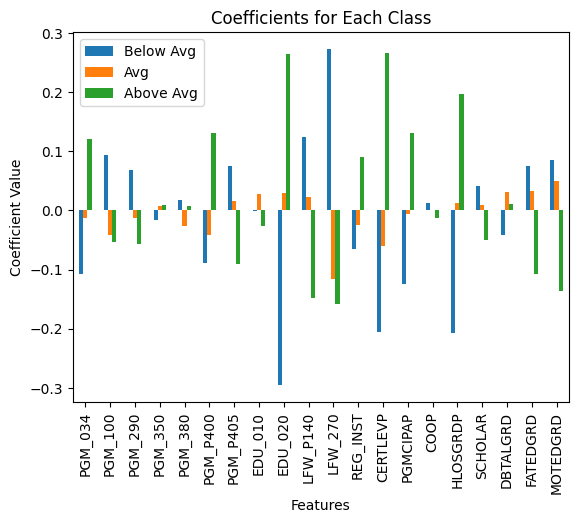

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

coefficients = pd.DataFrame(model.coef_, columns=x.columns)
coefficients.index = ['Below Avg', 'Avg', 'Above Avg']

# Plotting
coefficients.T.plot(kind='bar')
plt.title('Coefficients for Each Class')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

In [136]:
coefficients = pd.DataFrame(model.coef_, columns=x.columns)
coefficients.index = ['Below Avg', 'Avg', 'Above Avg']
coefficients['intercepts'] = model.intercept_

coefficients[['PGM_P405', 'intercepts']]

,PGM_P405,intercepts
Below Avg,0.074743,0.138231
Avg,0.016152,-0.055785
Above Avg,-0.090895,-0.082446


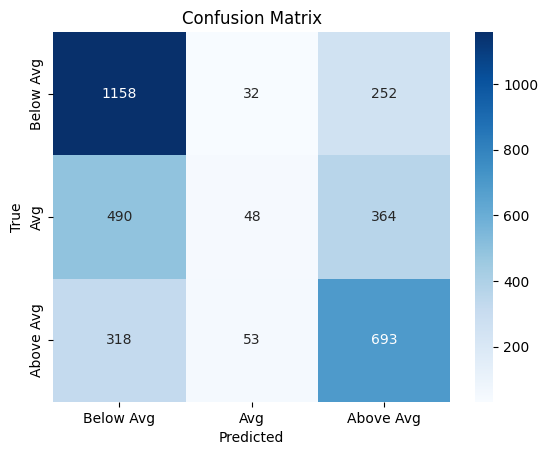

In [118]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Avg', 'Avg', 'Above Avg'], yticklabels=['Below Avg', 'Avg', 'Above Avg'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


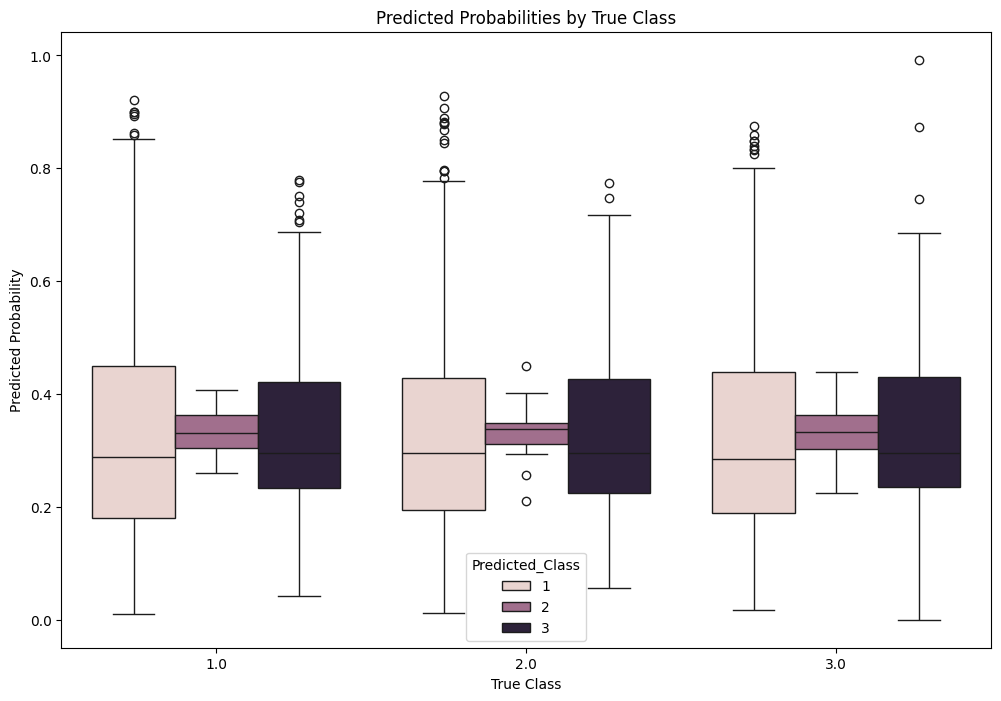

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Get predicted probabilities for each class
probs = model.predict_proba(x_test)

probs_df = pd.DataFrame(probs, columns=[f'Class_{i}' for i in model.classes_])

# Add a column for the predicted class
probs_df['Predicted_Class'] = model.predict(x_test)

# Assuming 'y_test' is your actual class labels
probs_df['True_Class'] = y_test

melted_probs = pd.melt(probs_df, id_vars=['Predicted_Class', 'True_Class'], value_vars=[f'Class_{i}' for i in model.classes_])

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='True_Class', y='value', hue='Predicted_Class', data=melted_probs)
plt.title('Predicted Probabilities by True Class')
plt.xlabel('True Class')
plt.ylabel('Predicted Probability')
plt.show()


C:\Users\aitaz\AppData\Local\Temp\ipykernel_1988\3575872332.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Total Samples', 'Retained Samples', 'Training Samples', 'Testing Samples'],
C:\Users\aitaz\AppData\Local\Temp\ipykernel_1988\3575872332.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=['Total Samples', 'Retained Samples', 'Training Samples', 'Testing Samples'],


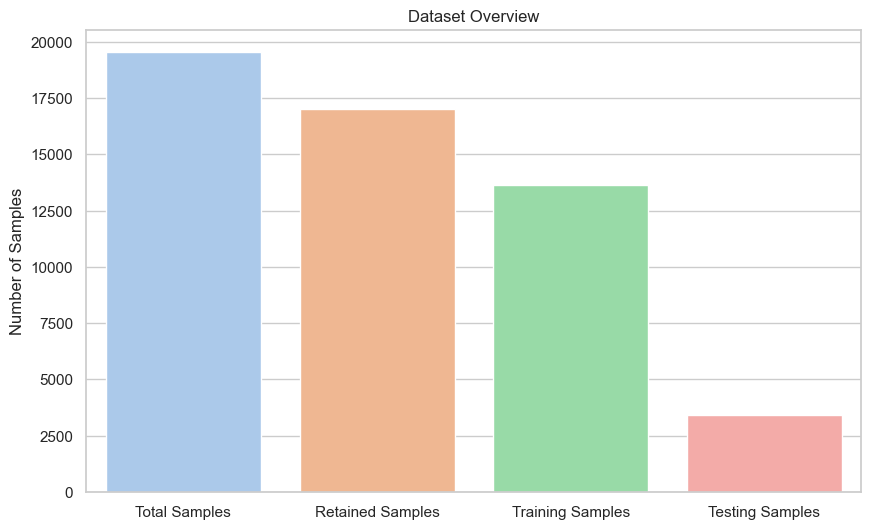

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")
# Assuming 'total_samples' is the total number of samples in the original dataset
org_df = pd.read_csv('NGS-81M0011-E-2018_F1.csv')
total_samples = 19564



# Calculate the number of samples retained after filtering
retained_samples = 17036

# Define the training/testing split
training_split = 0.8
testing_split = 0.2

colors = sns.color_palette("pastel")
# Calculate the number of samples for training and testing
train_samples = int(retained_samples * training_split)
test_samples = retained_samples - train_samples

# Create a bar chart
labels = ['Total Samples' , 'Retained Samples', 'Training Samples', 'Testing Samples']
values = [total_samples, retained_samples, train_samples, test_samples]
# Increase the size of the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=['Total Samples', 'Retained Samples', 'Training Samples', 'Testing Samples'],
            y=[total_samples, retained_samples, train_samples, test_samples],
            palette=colors)
plt.ylabel('Number of Samples')
plt.title('Dataset Overview')
plt.show()


In [24]:
org_df = pd.read_csv('NGS-81M0011-E-2018_F1.csv')
org_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PUMFID,19564.0,46028.723625,10336.578442,28111.0000,37056.7500,46054.0000,54992.500,63868.0000
VR2_080,19564.0,1.595533,0.490801,1.0000,1.0000,2.0000,2.000,2.0000
PGM_034,19564.0,1.303312,0.656447,1.0000,1.0000,1.0000,1.000,9.0000
PGM_P036,19564.0,5.176702,1.743217,1.0000,6.0000,6.0000,6.000,9.0000
PGM_100,19564.0,1.542936,0.570489,1.0000,1.0000,2.0000,2.000,9.0000
...,...,...,...,...,...,...,...,...
MOTEDINT,19564.0,1.793345,1.766655,1.0000,1.0000,1.0000,2.000,9.0000
DDIS_FL,19564.0,1.757054,0.428874,1.0000,2.0000,2.0000,2.000,2.0000
DTYPERP,19564.0,4.890667,1.995101,1.0000,6.0000,6.0000,6.000,9.0000
DCLASSP,19564.0,0.340166,0.744700,0.0000,0.0000,0.0000,0.000,9.0000
